<a href="https://colab.research.google.com/github/tiagopessoalima/covid-19/blob/master/pernambuco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bibliotecas**

In [0]:
import pandas as pd

**Dados**

In [0]:
pernambuco = pd.read_csv('https://raw.githubusercontent.com/tiagopessoalima/covid-19/master/dados/pernambuco.csv',sep=';')
pernambuco = pernambuco[pernambuco.classe=='CONFIRMADO']

In [0]:
pernambuco = pernambuco[pernambuco['comorbidades'].str.contains("CANCER|CARCINOMA|LEUCEMIA|ONCOLOG|NEOPLASIA", na=False)]
#pernambuco = pernambuco[(pernambuco.faixa_etaria=='0-9 anos') | (pernambuco.faixa_etaria=='10-19 anos')]

In [0]:
obito = pernambuco[pernambuco.evolucao=='OBITO']
recuperados = pernambuco[pernambuco.evolucao=='RECUPERADO']
transmissores = pernambuco[(pernambuco.evolucao!='OBITO') & (pernambuco.evolucao!='RECUPERADO')]

##**Síntese**

In [266]:
print('\nÓbitos:', len(obito))
print('Percentual de Óbitos:', 100*(len(obito)/(len(pernambuco))))

print('\nRecuperados:', len(recuperados))
print('Percentual de Recuperados:', 100*(len(recuperados)/(len(pernambuco))))

print('\nTransmissores:', len(transmissores))
print('Percentual de Transmisores:', 100*(len(transmissores)/(len(pernambuco))))


Óbitos: 62
Percentual de Óbitos: 83.78378378378379

Recuperados: 4
Percentual de Recuperados: 5.405405405405405

Transmissores: 8
Percentual de Transmisores: 10.81081081081081


##**Comorbidades**

In [0]:
def plotar_comorbidades(grupo):
  comorbidades = grupo.groupby('comorbidades').size()
  comorbidades.sort_values(inplace=True)
  comorbidades.plot.bar(figsize=(30,5))

**Óbito**

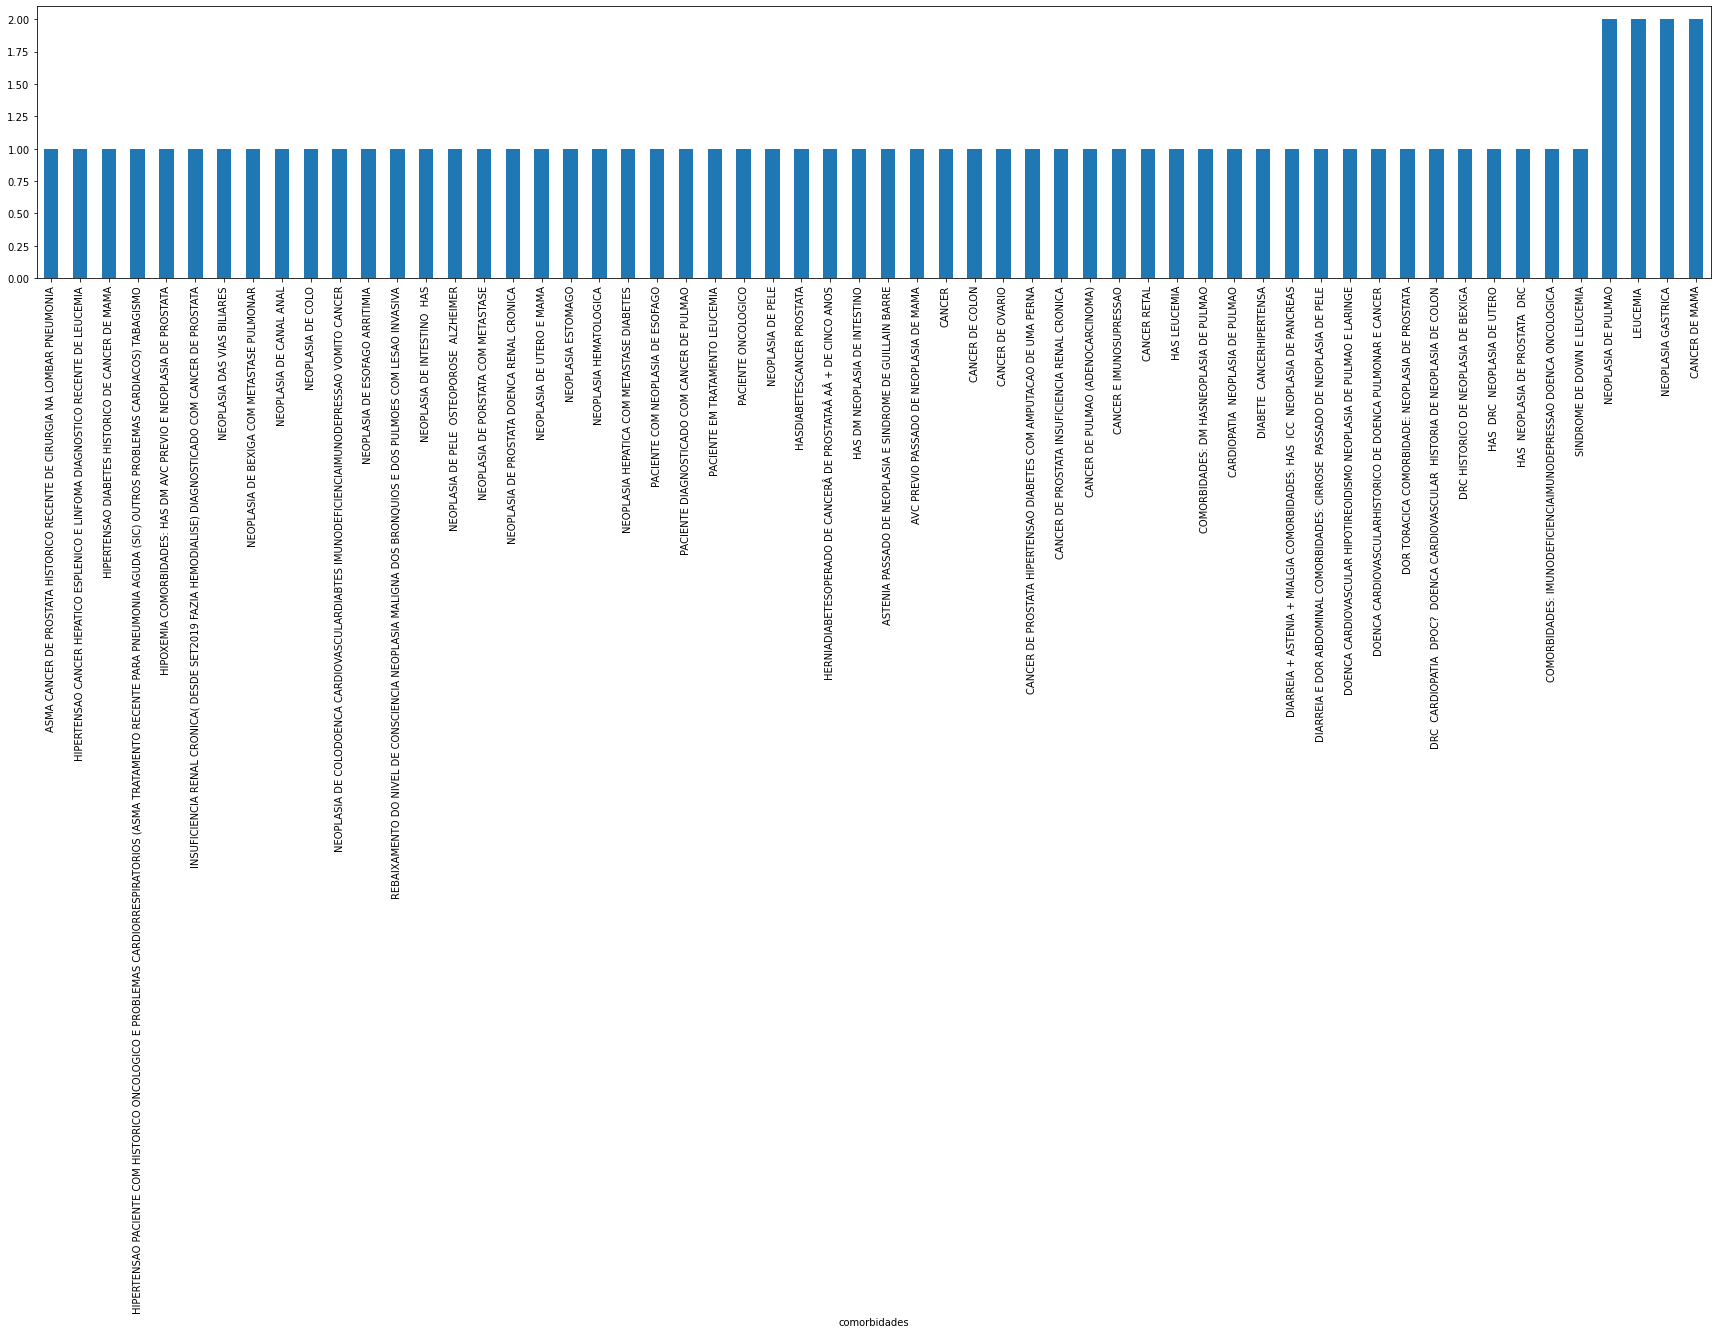

In [268]:
plotar_comorbidades(obito)

**Recuperados**

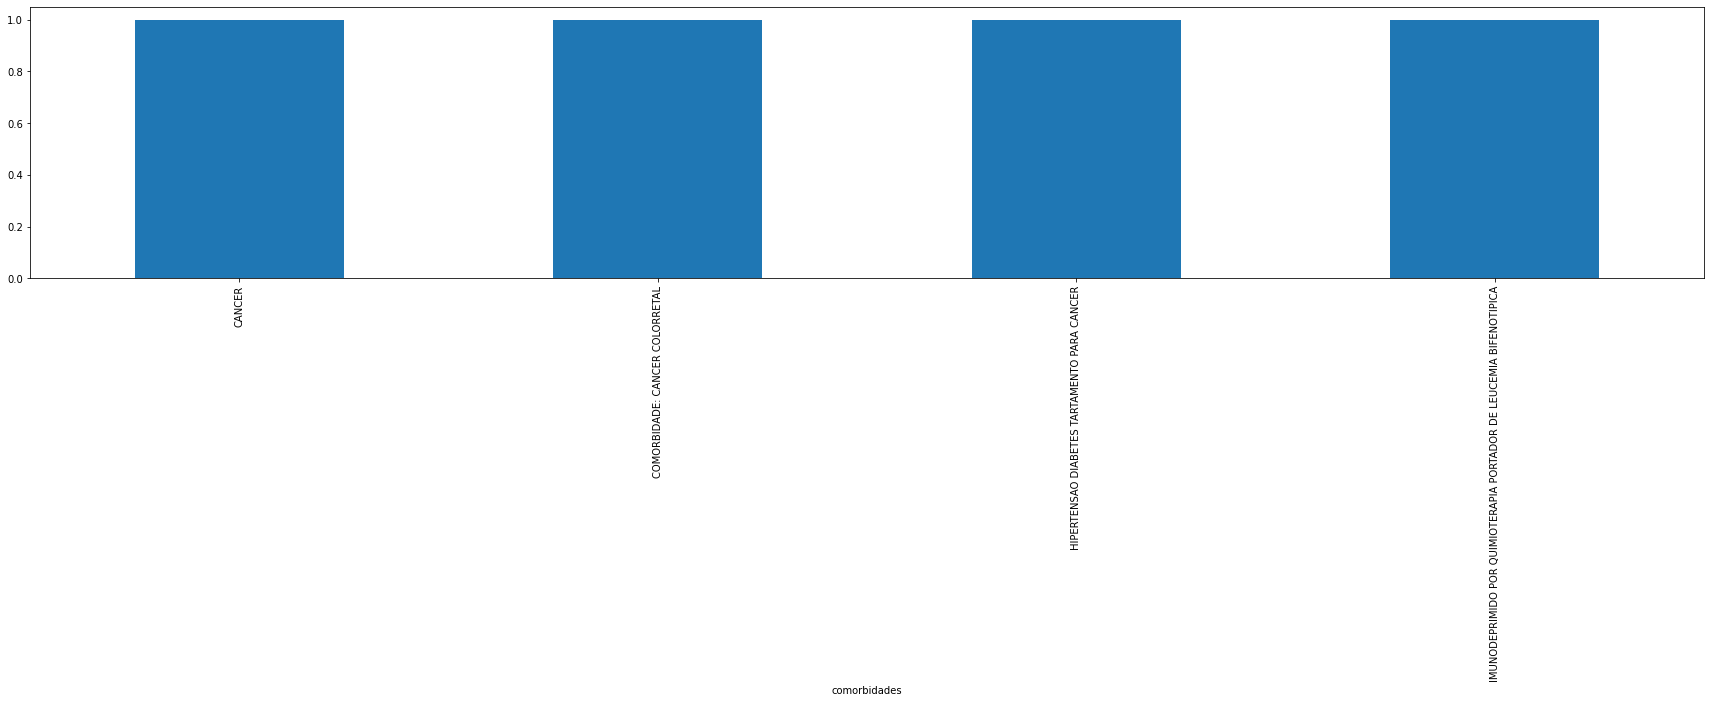

In [269]:
plotar_comorbidades(recuperados)

**Transmissores**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


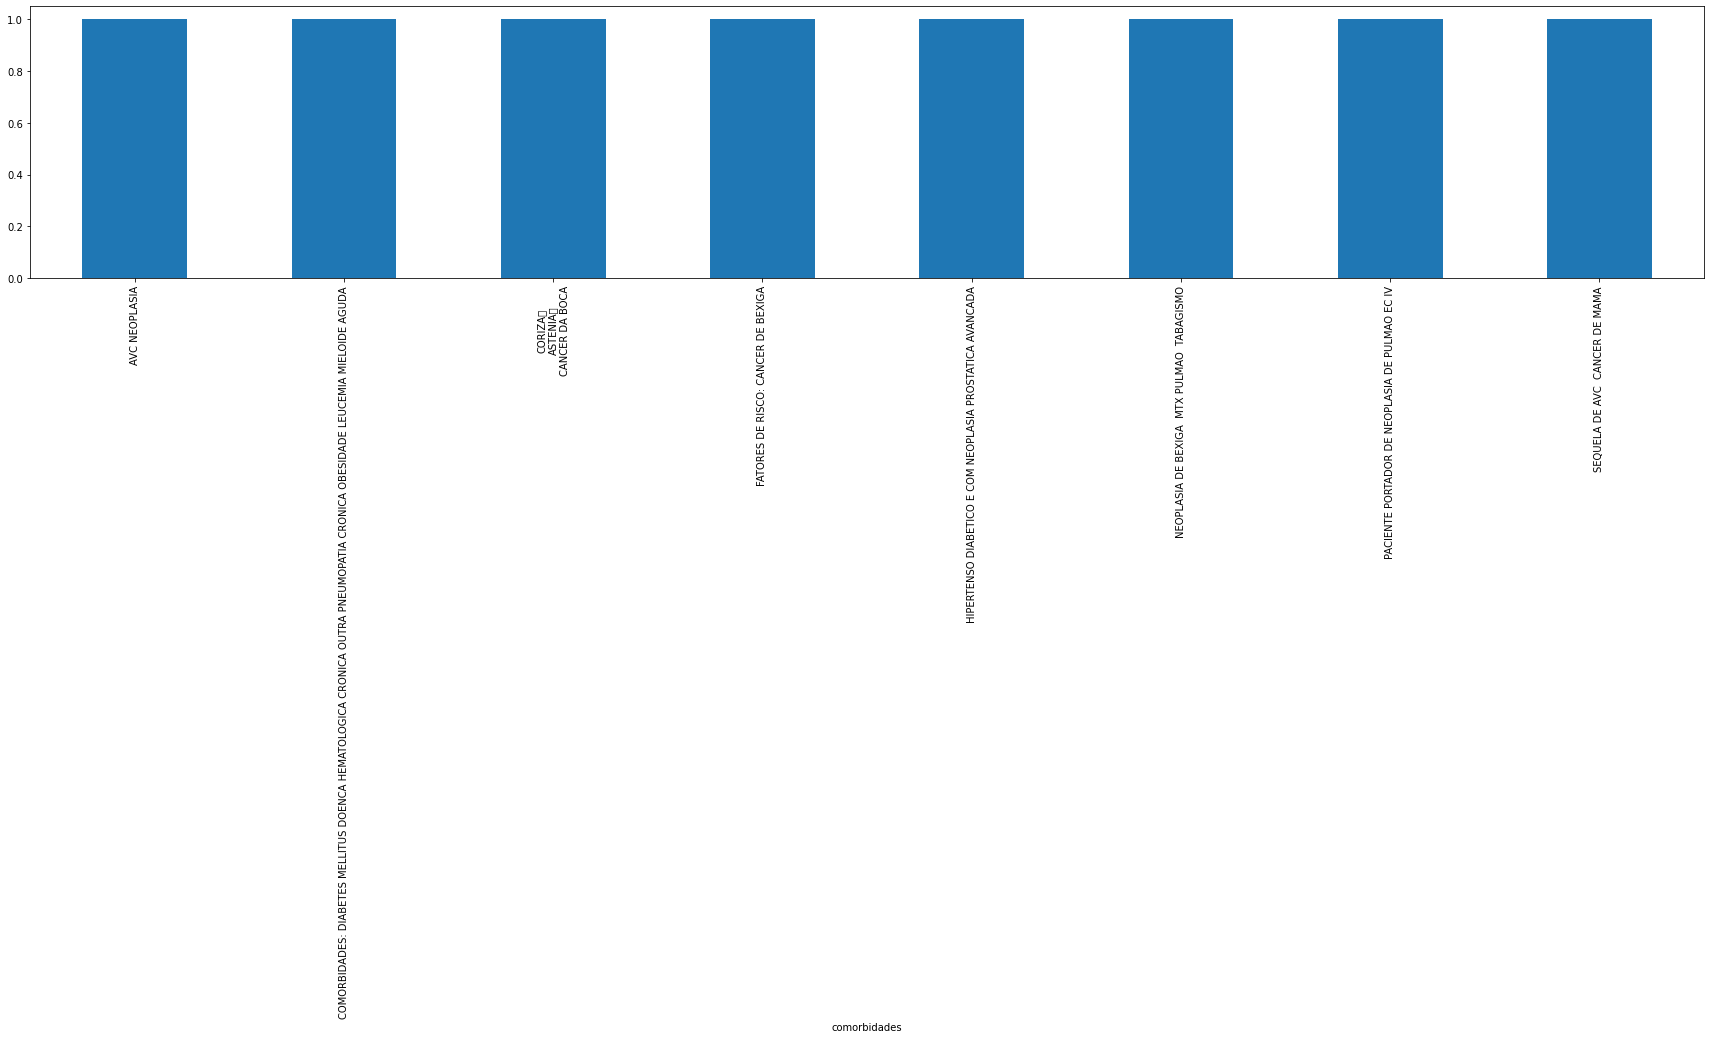

In [270]:
plotar_comorbidades(transmissores)

##**Data do óbito**

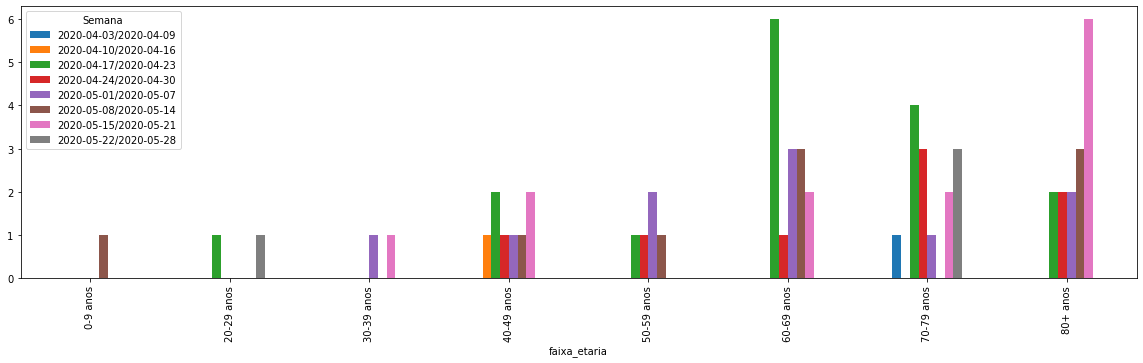

In [271]:
dt_obito = obito.copy()
dt_obito['dt_obito']=pd.to_datetime(dt_obito['dt_obito'])
dt_obito['Semana'] = dt_obito['dt_obito'].dt.to_period('W-THU')
dt_obito.groupby(['Semana', 'faixa_etaria']).size().unstack(0).plot.bar(figsize=(20,5))

##**Dias para o óbito**

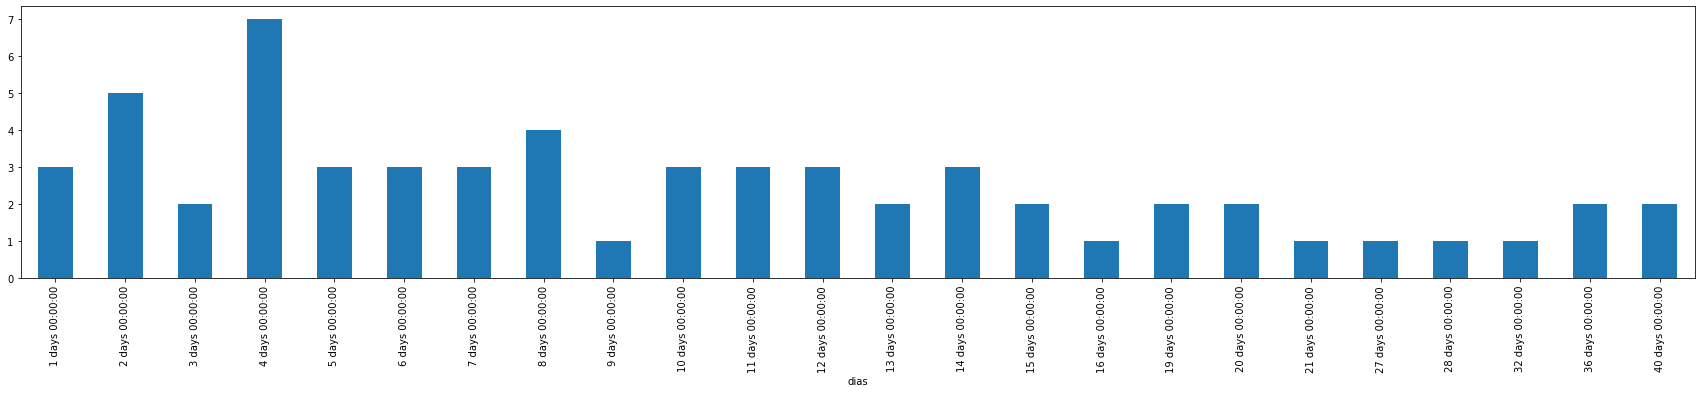

In [272]:
tempo = obito.copy()
tempo['dt_obito']=pd.to_datetime(tempo['dt_obito'])
tempo['dt_primeiros_sintomas']=pd.to_datetime(tempo['dt_primeiros_sintomas'])
tempo['dias'] = abs(tempo['dt_obito'] - tempo['dt_primeiros_sintomas'])
dias = tempo.groupby('dias')
dias.size().plot.bar(figsize=(30,5))

##**Hospitalização**

In [0]:
def plotar_hospitalizacao(grupo):
  hospitalizacao = grupo.groupby('hospitalizacao').size()
  hospitalizacao.plot.bar()
  print(hospitalizacao)

**Óbito**

hospitalizacao
NAO     5
SIM    53
dtype: int64


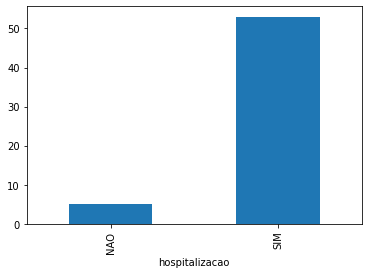

In [274]:
plotar_hospitalizacao(obito)

**Recuperados**

hospitalizacao
NAO    1
SIM    3
dtype: int64


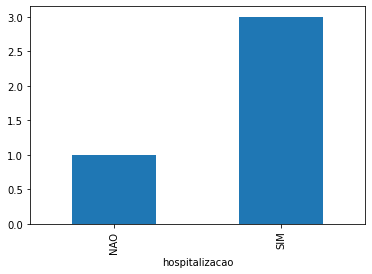

In [275]:
plotar_hospitalizacao(recuperados)

**Transmissores**

hospitalizacao
SIM    7
dtype: int64


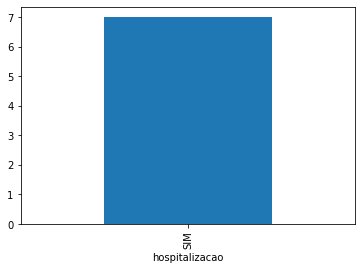

In [276]:
plotar_hospitalizacao(transmissores)

##**Município**

In [0]:
def plotar_municipio(grupo):
  municipio = grupo.groupby('municipio').size()
  municipio.sort_values(inplace=True)
  municipio.plot.bar(figsize=(30,5))

**Óbito**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


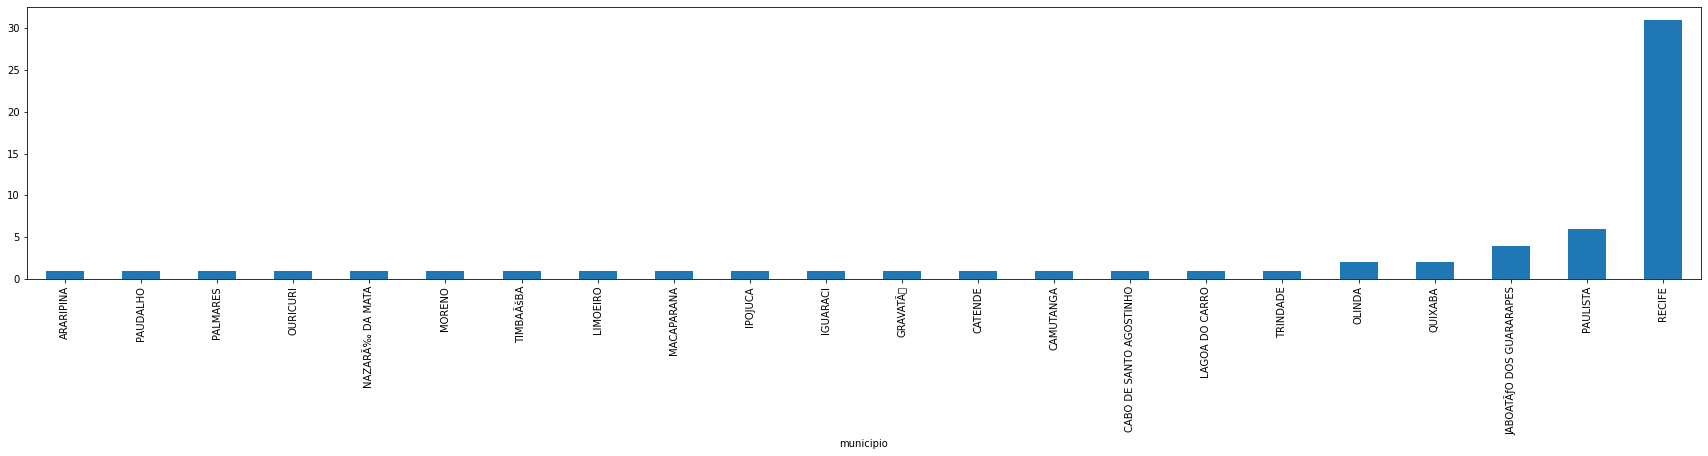

In [278]:
plotar_municipio(obito)

**Recuperados**

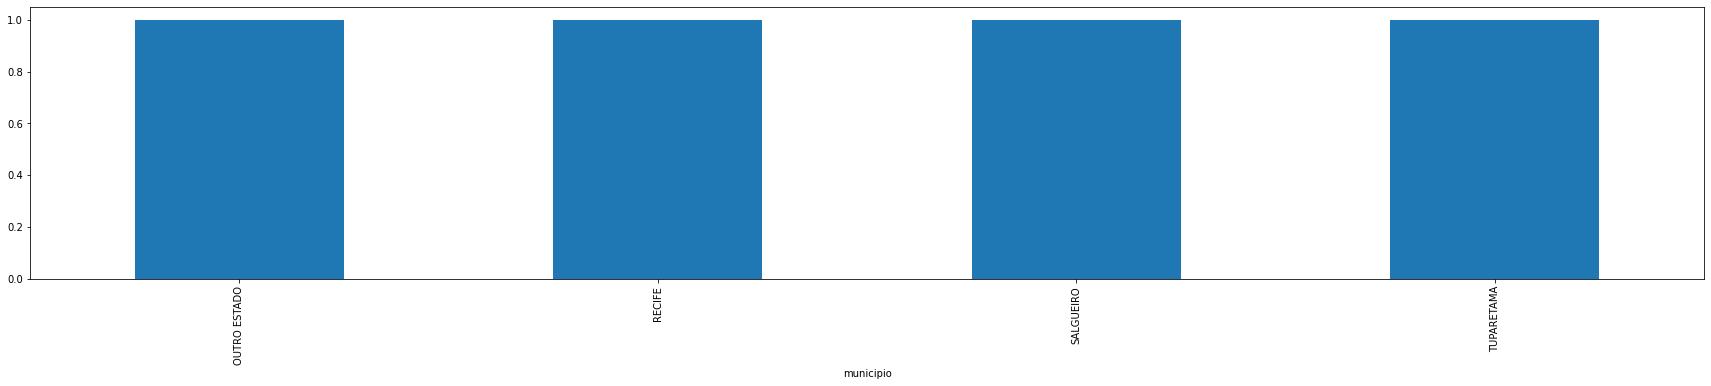

In [279]:
plotar_municipio(recuperados)

**Transmissores**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


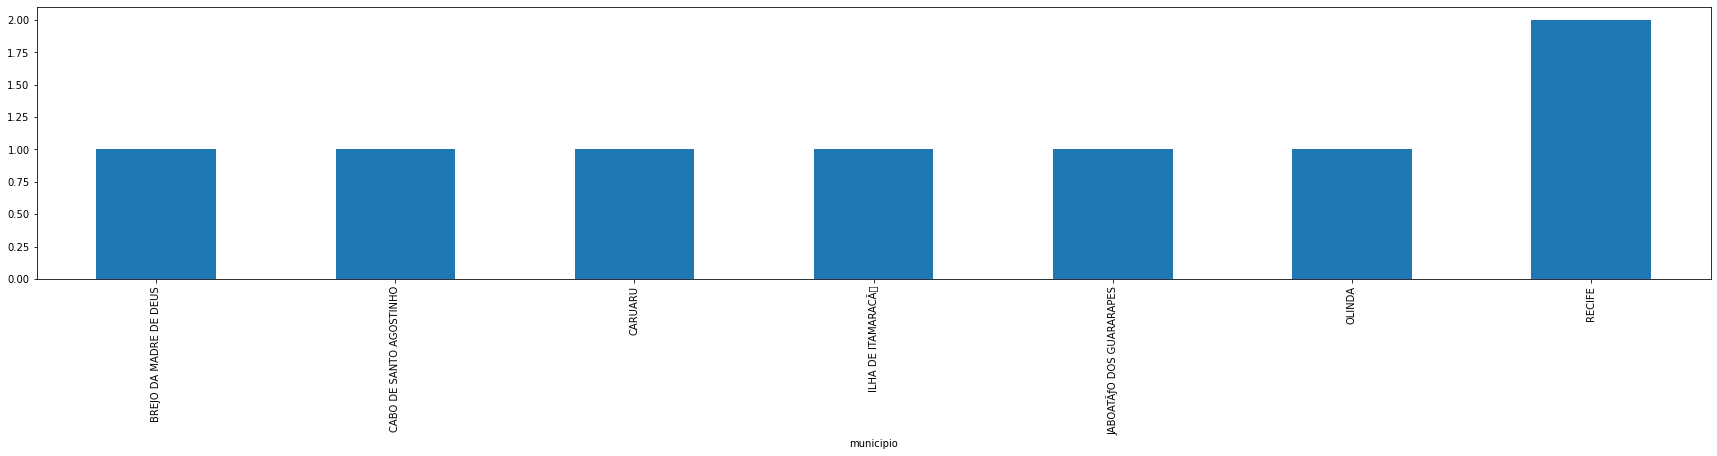

In [280]:
plotar_municipio(transmissores)

##**Sexo**

In [0]:
def plotar_sexo(grupo):
  sexo = grupo.groupby('Sexo').size()
  sexo.plot.bar()
  print(sexo)

**Óbito**

Sexo
FEMININO     22
MASCULINO    40
dtype: int64


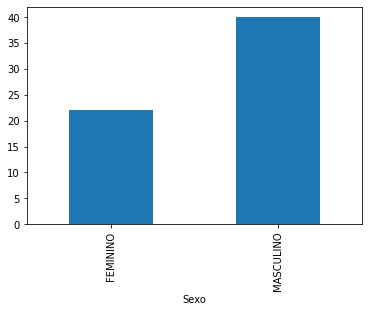

In [282]:
plotar_sexo(obito)

**Recuperados**

Sexo
FEMININO     3
MASCULINO    1
dtype: int64


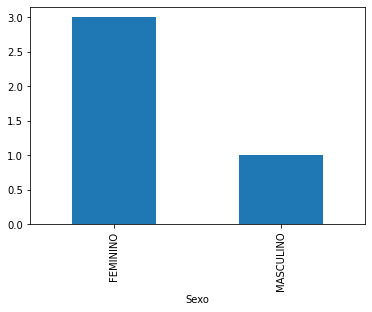

In [283]:
plotar_sexo(recuperados)

**Transmissores**

Sexo
FEMININO     5
MASCULINO    3
dtype: int64


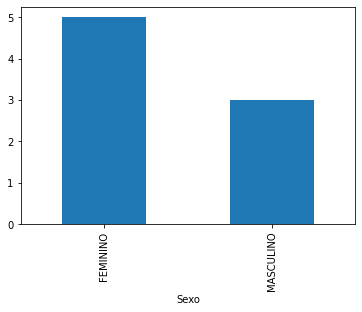

In [284]:
plotar_sexo(transmissores)

##**Sintomas**

In [0]:
def plotar_sintomas(grupo):
  sintomas = grupo.groupby('sintomas').size()
  sintomas.sort_values(inplace=True)
  sintomas.plot.bar(figsize=(30,5))

**Óbito**

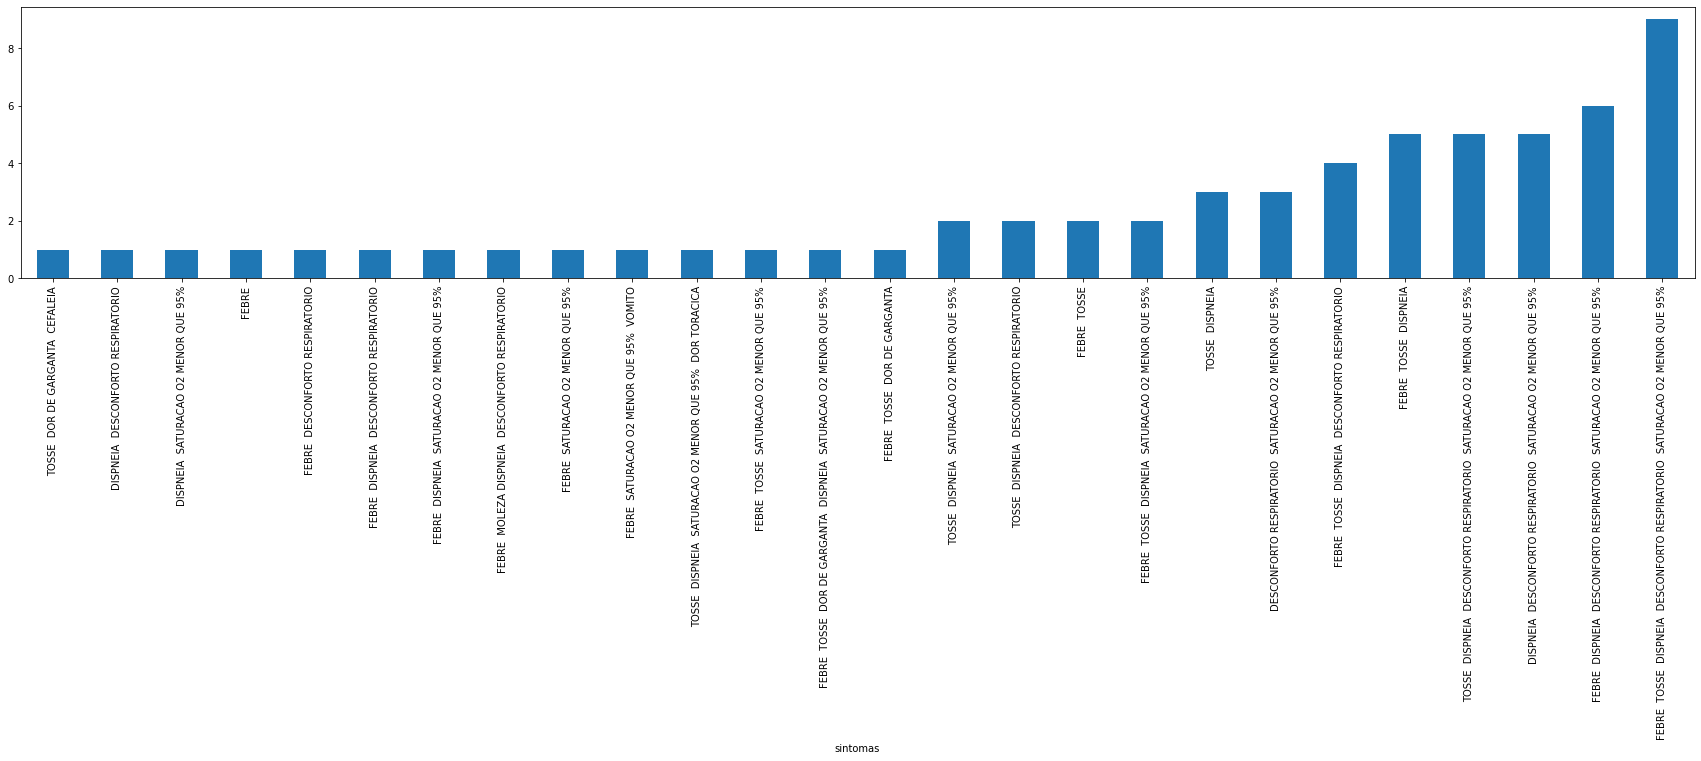

In [286]:
plotar_sintomas(obito)

**Recuperados**

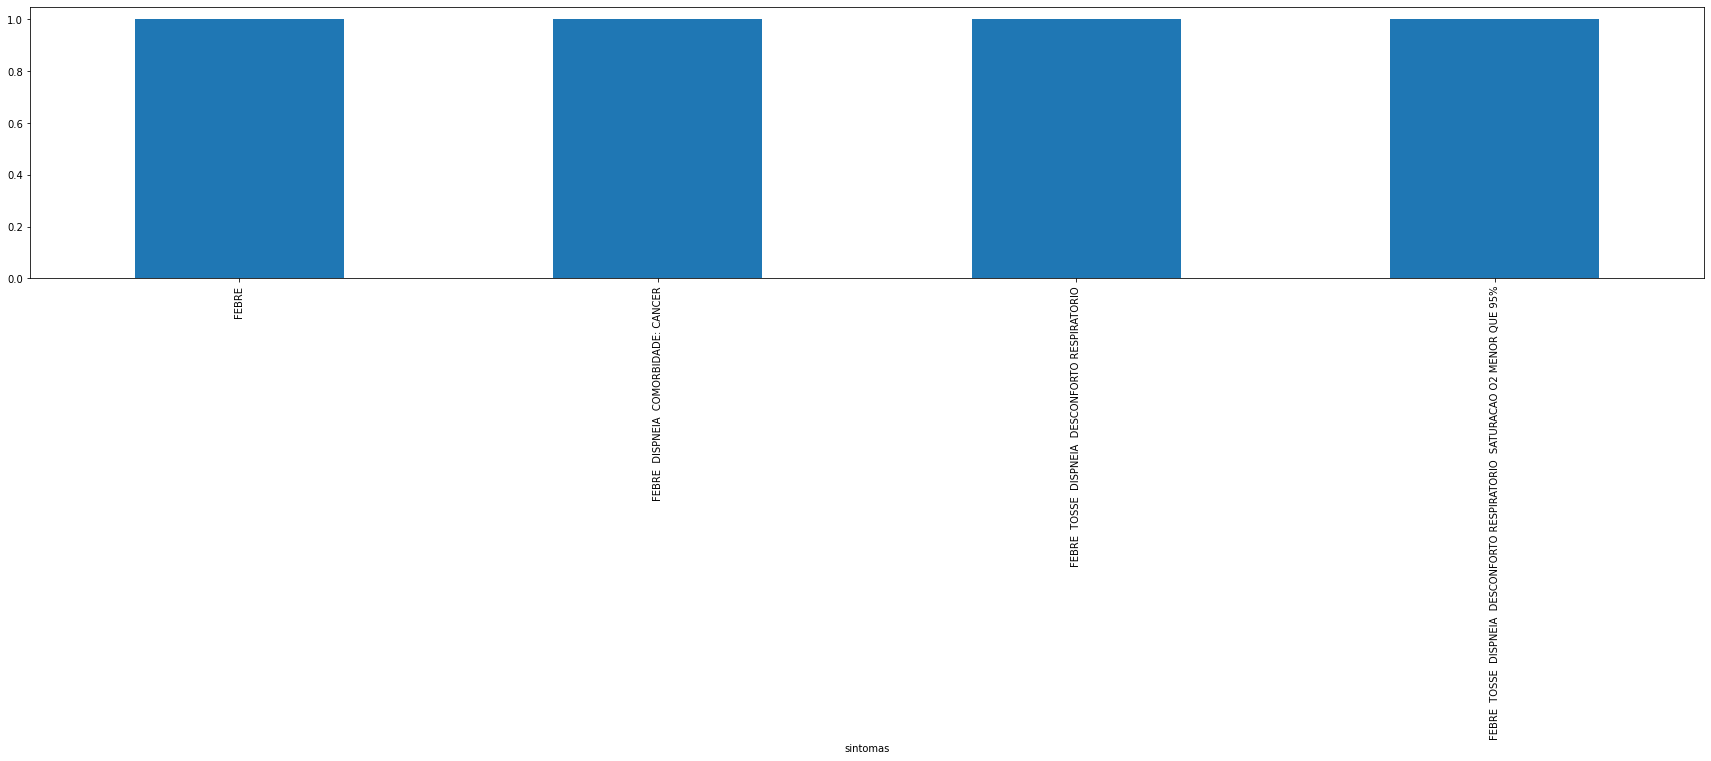

In [287]:
plotar_sintomas(recuperados)

**Transmissores**

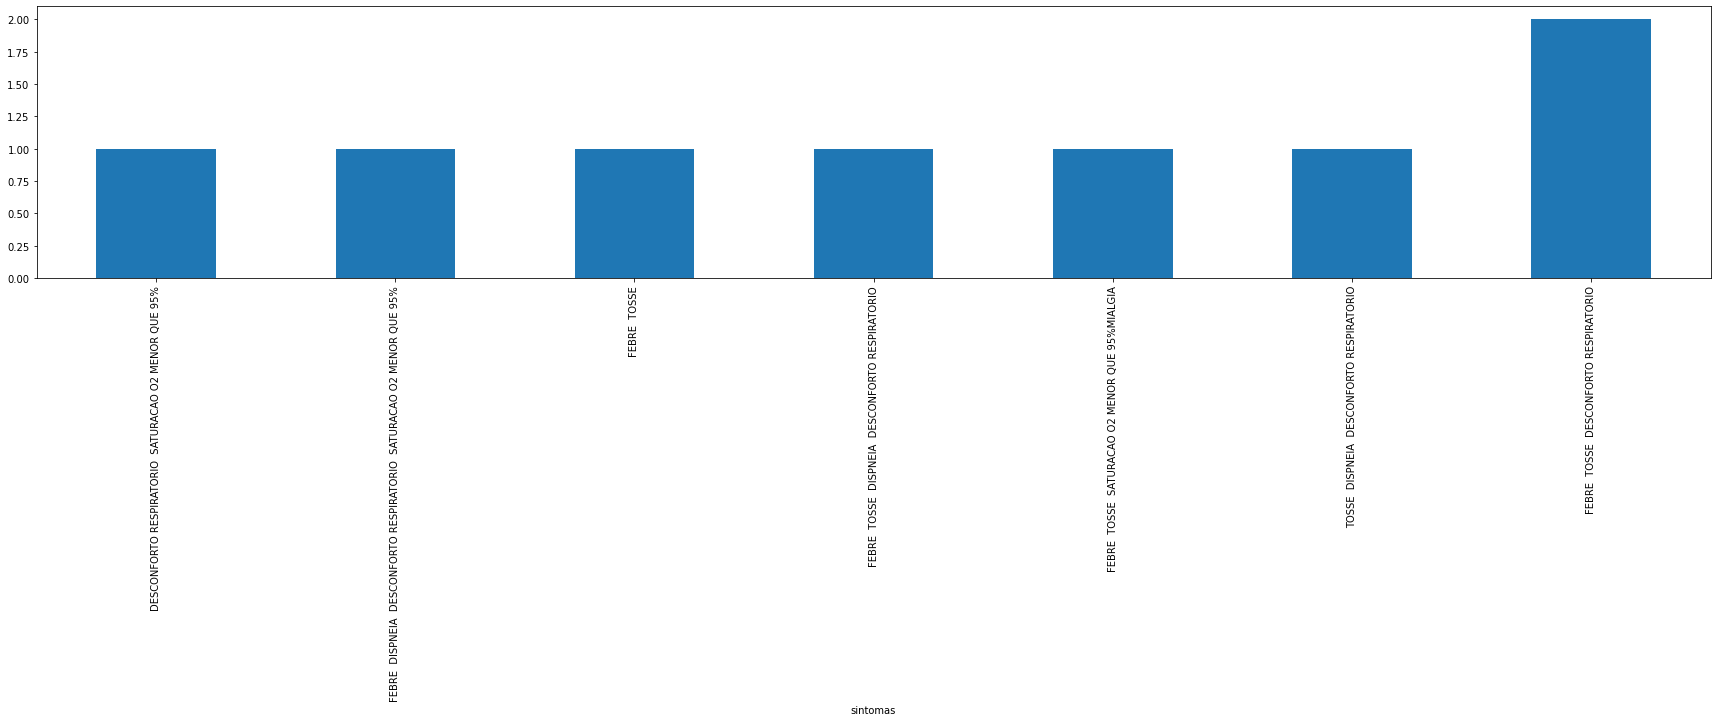

In [288]:
plotar_sintomas(transmissores)